#Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Carregamento dados

In [4]:
df = pd.read_csv("/content/drive/MyDrive/FIA - DATA ENGINEER /BASES/projeto-ia-datasets/Telco_customer_churn.csv", sep = ";")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


##Análise exploratória Univariada

In [5]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

##Informações do cliente: <br>
###ID: <br>
CustomerID <br>
###Gerográficas: <br>
Country,
State,
City,
Zio Code, Lat long, Latitude, Longitude
###Pessoais: <br>
'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months'<br>
###Serviço: <br>
'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies'<br>
###Serviço Financeiro: <br>
 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges',
<br>
###Churn: <br>
'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'

In [6]:
df.describe(include=[np.number])

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
df = df.rename(columns={'Churn Value':'Churn'})


In [8]:
df.describe(include=[np.object])

<ipython-input-8-554b7518cb2b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,2,4,6531,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3095,3473,2810,2785,3875,4171,2365,11,5174,192


In [9]:
Churn = (
    df["Churn"].value_counts()
)

In [10]:
(
    (Churn.loc[1]/(Churn.loc[1] + Churn.loc[0]))* 100

)

26.536987079369588

In [11]:
(
    df.query("Churn == 1")
    .filter( ['Churn','Churn Reason'])
    .value_counts()
)

Churn  Churn Reason                             
1      Attitude of support person                   192
       Competitor offered higher download speeds    189
       Competitor offered more data                 162
       Don't know                                   154
       Competitor made better offer                 140
       Attitude of service provider                 135
       Competitor had better devices                130
       Network reliability                          103
       Product dissatisfaction                      102
       Price too high                                98
       Service dissatisfaction                       89
       Lack of self-service on Website               88
       Extra data charges                            57
       Moved                                         53
       Limited range of services                     44
       Long distance charges                         44
       Lack of affordable download/upload speed      44

<Axes: xlabel='Contract', ylabel='Churnsoma'>

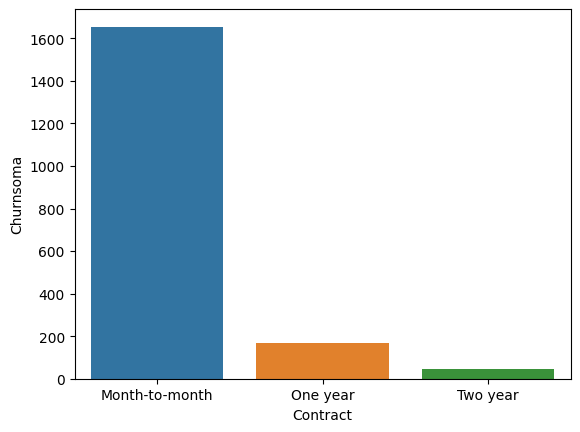

In [12]:
barplotcontract = (
    df.filter(['Churn','Contract'])
    .groupby("Contract")
    .agg(Churnsoma = ("Churn","sum"), Churncount = ("Churn","count"))
    .reset_index()
)
barplotcontract["ContratPorcentagem"] = (barplotcontract["Churnsoma"]/barplotcontract["Churncount"])*100
sns.barplot(data = barplotcontract, x='Contract', y="Churnsoma" )


<Axes: xlabel='Contract', ylabel='ContratPorcentagem'>

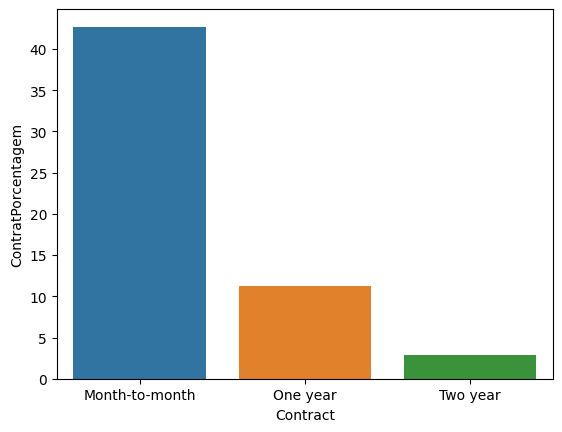

In [13]:
sns.barplot(data = barplotcontract, x='Contract', y="ContratPorcentagem")

In [14]:
barplotcontract


,Contract,Churnsoma,Churncount,ContratPorcentagem
0,Month-to-month,1655,3875,42.709677
1,One year,166,1473,11.269518
2,Two year,48,1695,2.831858


#Limpeza de dados

In [15]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn                   0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [16]:
df.iloc[:,9:].head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn,Churn Score,CLTV,Churn Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [17]:
df.drop(columns=["Churn Score"],inplace = True)

In [18]:
df.drop(columns=["Churn Reason"],inplace = True)

In [19]:
new_labels = list()
for i in range(len(df.columns)):
  new_labels.append(df.columns[i].replace(" ",""))

new_labels

df.columns = new_labels
df.head()


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,Churn,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,5340


In [20]:
df.replace({"SeniorCitizen": {"Yes":True,"No":False},
            "Partner": {"Yes":True,"No":False},
            "Dependents": {"Yes":True,"No":False},
            "PhoneService": {"Yes":True,"No":False},
            "MultipleLines": {"Yes":True,"No":False},
            "OnlineSecurity": {"Yes":True,"No":False},
            "OnlineBackup": {"Yes":True,"No":False},
            "DeviceProtection": {"Yes":True,"No":False},
            "TechSupport": {"Yes":True,"No":False},
            "StreamingTV": {"Yes":True,"No":False},
            "StreamingMovies": {"Yes":True,"No":False},
            "PaperlessBilling": {"Yes":True,"No":False},
            "ChurnLabel": {"Yes":True,"No":False},

           },inplace = True)
df.iloc[:,1:].head()

,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,Churn,CLTV
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,False,...,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,1,3239
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,False,...,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,1,2701
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,False,...,True,True,Month-to-month,True,Electronic check,99.65,820.5,True,1,5372
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,False,...,True,True,Month-to-month,True,Electronic check,104.80,3046.05,True,1,5003
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,False,...,True,True,Month-to-month,True,Bank transfer (automatic),103.70,5036.3,True,1,5340


#Análise Bivariada

<ipython-input-21-0038642218e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: >

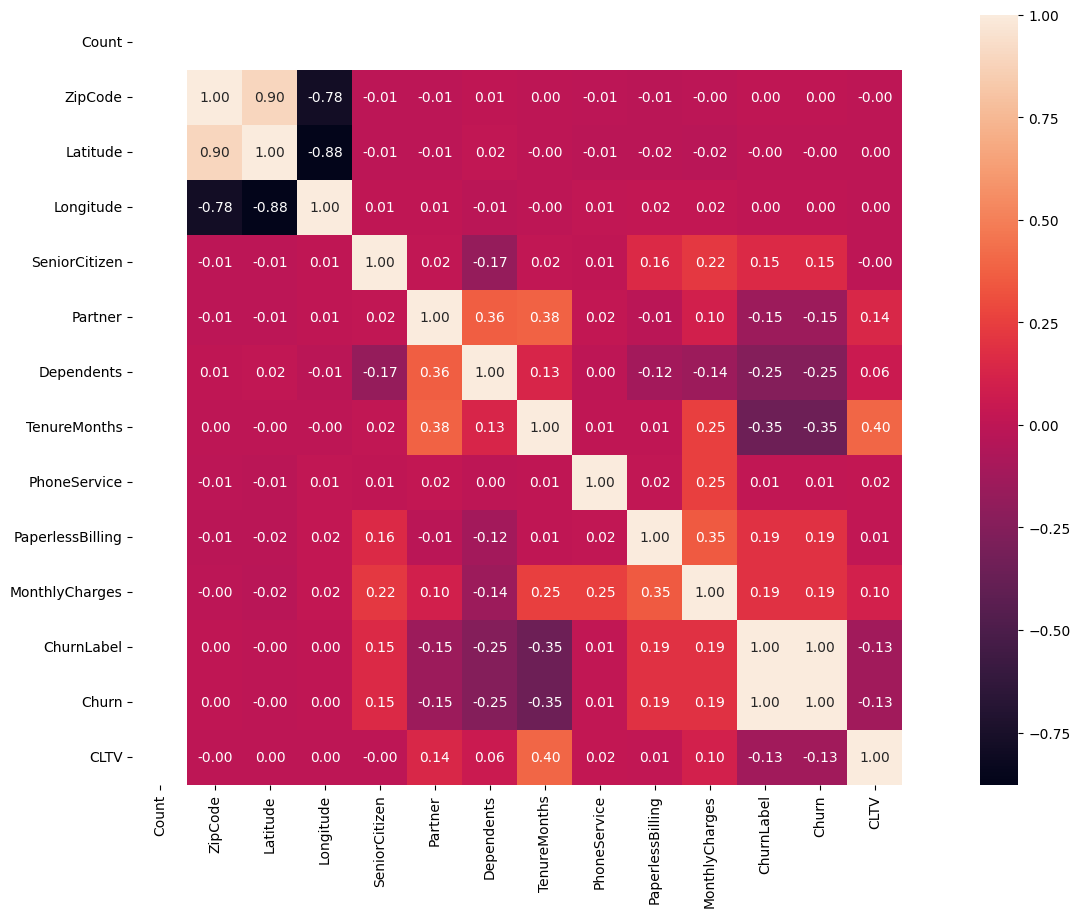

In [21]:
correlacao = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlacao,annot =True, cbar = True, square = True,fmt = ".2f")

#Criação Modelo de Regressão Logistica

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
df.columns.to_list()

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'ZipCode',
 'LatLong',
 'Latitude',
 'Longitude',
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'TenureMonths',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'ChurnLabel',
 'Churn',
 'CLTV']

In [55]:
#split
noventa = round((len(df)*50)/100)

In [56]:
TRAIN = df[:noventa]
TESTE = df[noventa:]

In [63]:
modelo = smf.glm(formula = "Churn ~ SeniorCitizen + Partner+\
                            Dependents+TenureMonths+PhoneService+\
                            Contract+PaperlessBilling+\
                            MonthlyCharges",
                  data = df,
                 family = sm.families.Binomial()
                 ).fit()

In [64]:
print(modelo.summary2())

                    Results: Generalized linear model
Model:                 GLM                 AIC:               5811.4191  
Link Function:         Logit               BIC:               -56519.4804
Dependent Variable:    Churn               Log-Likelihood:    -2895.7    
Date:                  2023-07-09 19:11    LL-Null:           -4075.1    
No. Observations:      7043                Deviance:          5791.4     
Df Model:              9                   Pearson chi2:      6.72e+03   
Df Residuals:          7033                Scale:             1.0000     
Method:                IRLS                                              
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -0.9837   0.1201  -8.1910 0.0000 -1.2191 -0.7484
SeniorCitizen[T.True]     0.2295   0.0822   2.7921 0.0052 

In [66]:
df["prob"] = modelo.fittedvalues
df

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,Churn,CLTV,prob
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,False,Month-to-month,True,Mailed check,53.85,108.15,True,1,3239,0.508539
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,False,Month-to-month,True,Electronic check,70.70,151.65,True,1,2701,0.253216
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,True,Month-to-month,True,Electronic check,99.65,820.5,True,1,5372,0.376431
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,True,Month-to-month,True,Electronic check,104.80,3046.05,True,1,5003,0.295540
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,True,Month-to-month,True,Bank transfer (automatic),103.70,5036.3,True,1,5340,0.119776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,Two year,True,Bank transfer (automatic),21.15,1419.4,False,0,5306,0.004465
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,True,One year,True,Mailed check,84.80,1990.5,False,0,2140,0.096590
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,True,One year,True,Credit card (automatic),103.20,7362.9,False,0,5560,0.026673
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,False,Month-to-month,True,Electronic check,29.60,346.45,False,0,2793,0.183958


In [38]:
df["Churn"].mean()

0.2653698707936959

In [67]:
df["propenso"] = np.where(df["prob"]>= df["Churn"].mean(),1,0)

In [68]:
pd.crosstab(df["Churn"],df["propenso"],normalize = "index")

propenso,0,1
Churn,,
0,0.729030,0.270970
1,0.194222,0.805778


#Resultados

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
accuracy = accuracy_score(df["Churn"], df["propenso"])
precision = precision_score(df["Churn"], df["propenso"])
recall = recall_score(df["Churn"], df["propenso"])
f1 = f1_score(df["Churn"], df["propenso"])

print(f"Acuracia do modelo: {accuracy:.2f}")
print(f"Precision do modelo: {precision:.2f}")
print(f"Recall do modelo: {recall:.2f}")
print(f"F1 do modelo: {f1:.2f}")


Acuracia do modelo: 0.75
Precision do modelo: 0.52
Recall do modelo: 0.81
F1 do modelo: 0.63
